## k最近傍法：怠惰学習アルゴリズム

### k最近傍法分類法
1. kの値と距離指標を選択する。
2. 分類したいデータ点からk個の最近傍データ点を見つけ出す。
3. 多数決によりクラスラベルを割り当てる。

In [1]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]  # we only take the first two features.
y = iris.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)  # fit only on the training data
X_train_std = scaler.transform(X_train)  # transform training data
X_test_std = scaler.transform(X_test)  # transform test data using the same scaler

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

In [2]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # マーカーとカラーマップの準備
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 決定領域のプロット
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)

    # グリッドポイントの等高線をプロット
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)

    # 軸の範囲の設定
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # クラスごとに訓練データをプロット
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=f'Class{cl}',
                    edgecolor='black')
        
    # テストデータ点を目立たせる（点を○で表示）
    if test_idx:
        # すべてのテストデータ点をプロット
        X_test, y_test = X[test_idx], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='none', alpha=1.0, linewidths=1, marker='o', s=100, label='Test set', edgecolor='black')


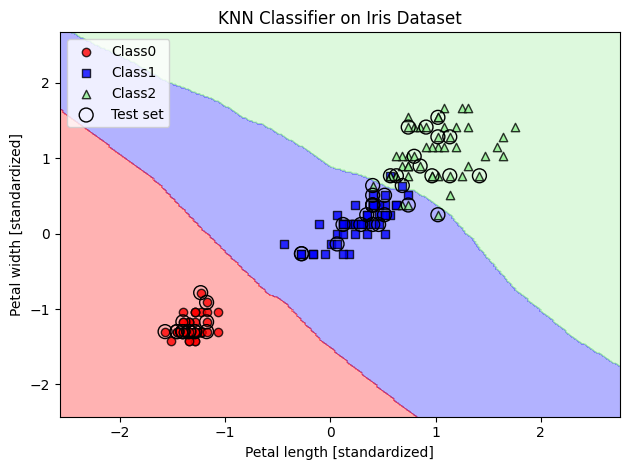

In [3]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=knn, test_idx=range(len(y_train), len(y_combined)))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.title('KNN Classifier on Iris Dataset')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

次元の呪いの影響を受けやすい。データセットの次元が増えると空間が徐々にまばらになるため、うまく推定できない場合がある。